---

# 2. Deep Learning with Tensorflow 2 (Convolution and Simple Image Processing)

# Goal: 

## Convolution and Simple Image Processing with Tf

# _00. Import Main Libraries_

# _01. Random Image and Filter Construction_

# _02. Convolution Operations (Same, Valid)_

# _03. Simple Image Processing_

# _04. Mnist Num3 Observation and a Test Processing_

---
---
---

# _00. Import Main Libraries_

In [1]:
import tensorflow as tf

In [2]:
import numpy as np

from scipy import signal
from scipy import misc

from PIL import Image

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# _01. Random Image and Filter Construction_

In [4]:
# 10x10 image (4D tensor = [1,10,10,1] = [batch size, width, height, number of channels]

# 3x3 filter (4D tensor = [3,3,1,1] = [width, height, channels, number of filters])

In [5]:
input = tf.Variable(tf.random.normal([1, 10, 10, 1]))
filter = tf.Variable(tf.random.normal([3, 3, 1, 1]))

# _02. Convolution Operations (Same, Valid)_

In [6]:
convedValid = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='VALID')

convedSame = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='SAME')

In [7]:
print("Input Shape \n")
print('{0} \n'.format(input.numpy().shape))
print("Filter/Kernel Shape \n")
print('{0} \n'.format(filter.numpy().shape))
print('\n')
print("Result/Feature Map Shape with valid positions (Valid) \n")
print(convedValid.numpy().shape)
print('\n')
print("Result/Feature Map Shape with padding (Same) \n")
print(convedSame.numpy().shape)

Input Shape 

(1, 10, 10, 1) 

Filter/Kernel Shape 

(3, 3, 1, 1) 



Result/Feature Map Shape with valid positions (Valid) 

(1, 8, 8, 1)


Result/Feature Map Shape with padding (Same) 

(1, 10, 10, 1)


# _03. Simple Image Processing_

In [8]:
# open the image

img = Image.open('arrows.jpg')

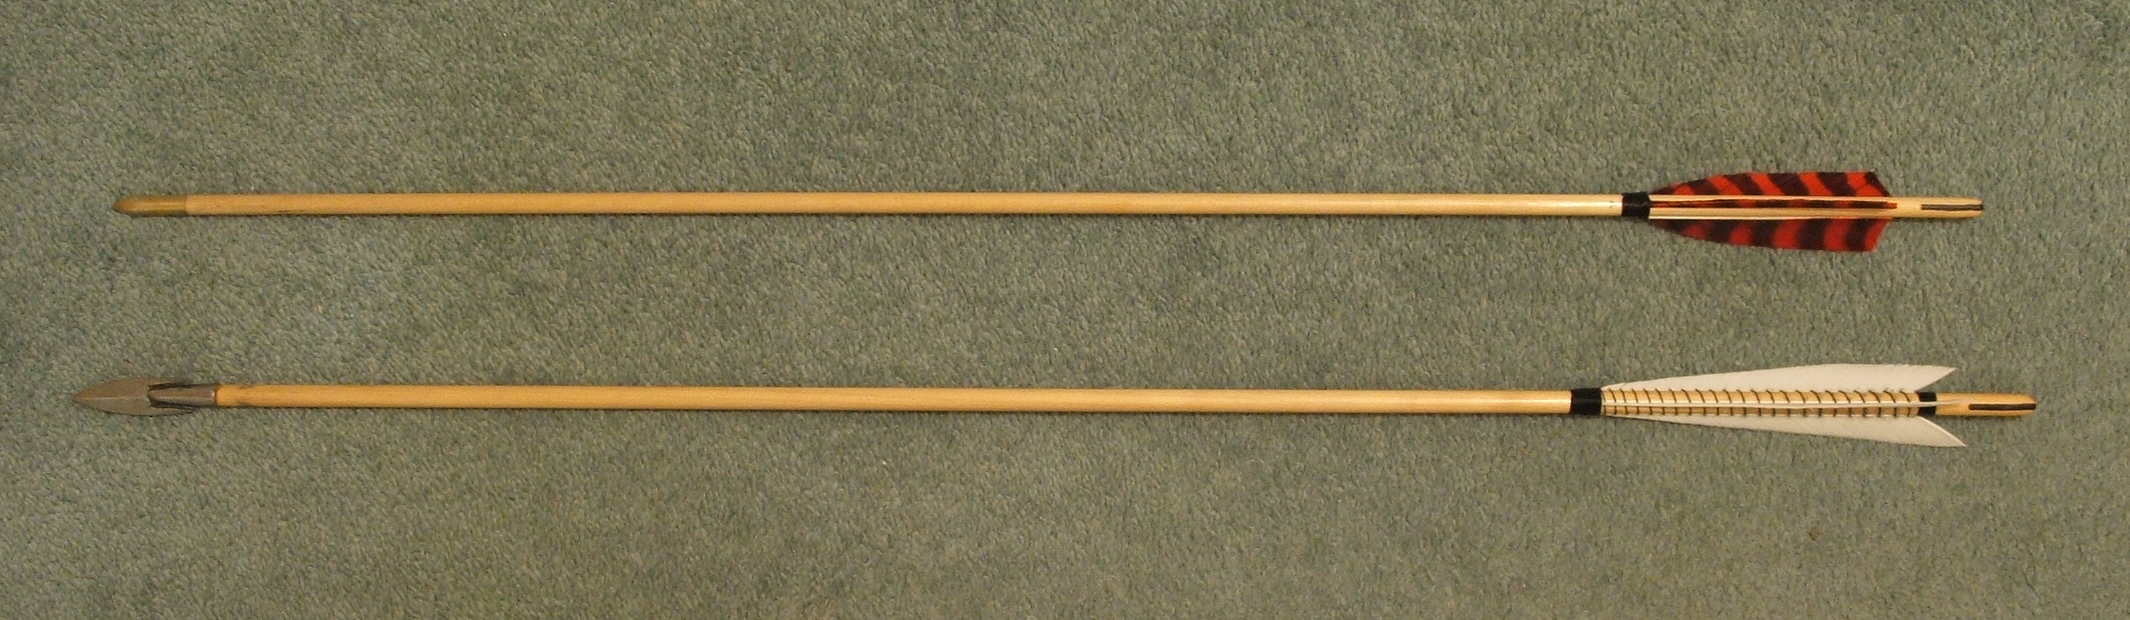

In [9]:
img

In [10]:
# transform it to grayscale

image_gr = img.convert("L")

In [11]:
print("\n Original type: %r \n\n" % image_gr)


 Original type: <PIL.Image.Image image mode=L size=2130x620 at 0x407D74B340> 




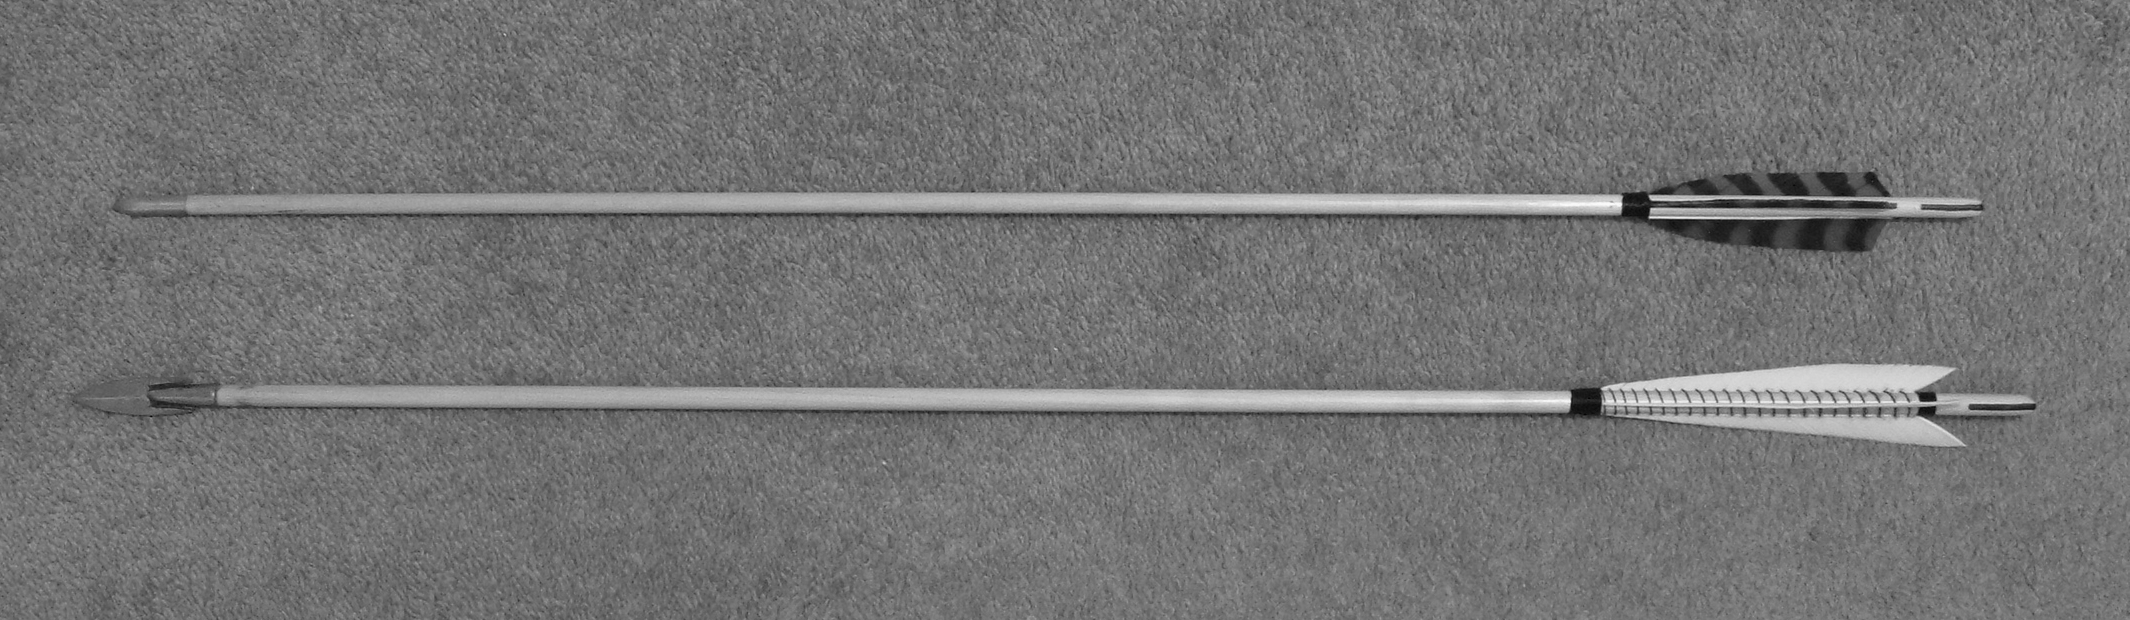

In [12]:
image_gr

In [13]:
# convert image to a matrix with values from 0 to 255 (uint8) 
imgArr = np.asarray(image_gr) 

print("After conversion to numerical representation: \n\n %r" % imgArr)

After conversion to numerical representation: 

 array([[103, 101,  88, ..., 117, 116, 111],
       [120, 134, 113, ..., 118, 120, 113],
       [121, 137, 141, ..., 127, 133, 131],
       ...,
       [122, 112, 106, ..., 128, 117, 120],
       [123, 120, 117, ..., 133, 126, 124],
       [117, 117, 125, ..., 134, 133, 133]], dtype=uint8)



 Input image converted to gray scale: 



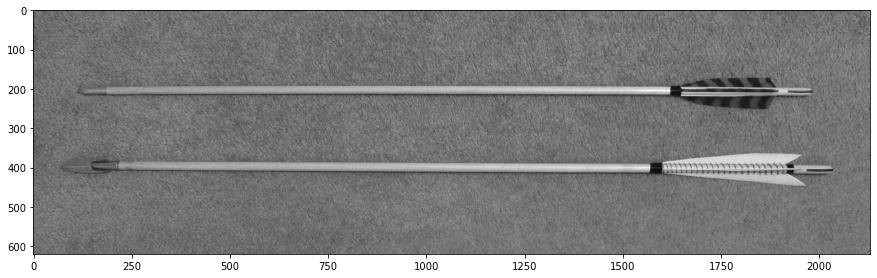

In [14]:
# Plot image

fig, ax = plt.subplots(figsize=(15, 10))
imgplot = ax.imshow(imgArr)
imgplot.set_cmap('gray')  #you can experiment different colormaps (Greys,winter,autumn)
print("\n Input image converted to gray scale: \n")

plt.show(imgplot)

In [15]:
# kernel to convolve

kernel = np.array([[ 0, 1, 0],
                   [ 1,-4, 1],
                   [ 0, 1, 0],]) 

grad = signal.convolve2d(imgArr, kernel, mode='same', boundary='symm')

Gradient Magnitude


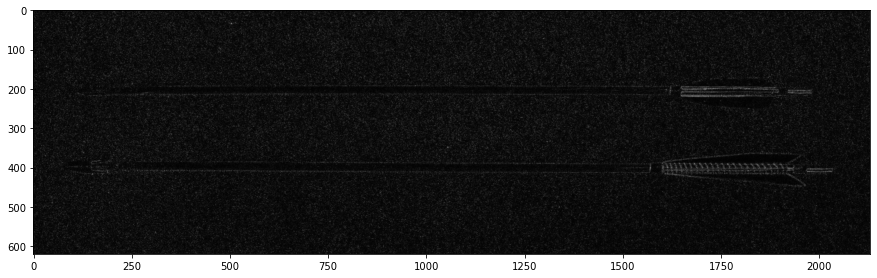

In [16]:
print('Gradient Magnitude')

fig, aux = plt.subplots(figsize=(15, 10))
aux.imshow(np.absolute(grad), cmap='gray')

In [17]:
# let's see the effect of biases

grad_biased = np.absolute(grad) + 50

grad_biased[grad_biased > 255] = 0

In [18]:
grad_biased

array([[ 65,  72,  76, ...,  51,  50,  57],
       [ 52, 115,  57, ...,  57,  50,  73],
       [ 63,  84, 130, ...,  57,  66,  59],
       ...,
       [ 85,  55,  64, ...,  63,  72,  50],
       [ 60,  61,  54, ...,  55,  53,  57],
       [ 56,  61,  65, ...,  56,  56,  59]])

Gradient Magnitude


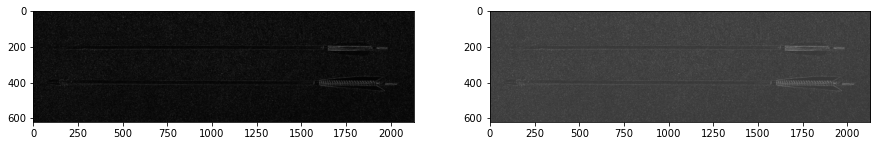

In [19]:
print('Gradient Magnitude')
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 10))

ax1.imshow(np.absolute(grad), cmap='gray')
ax2.imshow(np.absolute(grad_biased), cmap='gray')

# _04. Mnist Num3 Observation and a Test Processing_

In [20]:
imgNum3 = Image.open('num3.jpg')

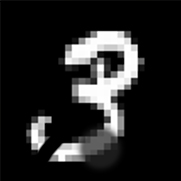

In [21]:
imgNum3

In [22]:
# transform it to grayscale

imageNum3_gr = imgNum3.convert("L")

In [23]:
# convert image to a matrix with values from 0 to 255 (uint8) 

num3arr = np.asarray(imageNum3_gr)


 Input image converted to winter colormap: 



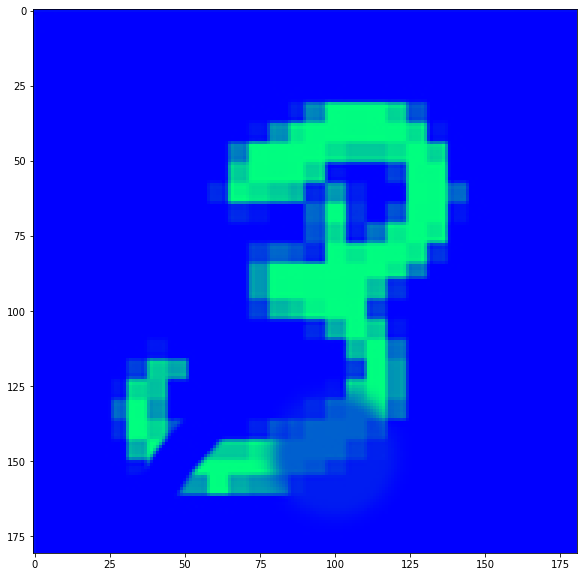

In [24]:
### Plot image
fig, ax = plt.subplots(figsize=(10, 10))
imgplot = plt.imshow(num3arr)
imgplot.set_cmap('winter')  #you can experiment different colormaps (Greys,winter,autumn)
print("\n Input image converted to winter colormap: \n")
plt.show(imgplot)